In [1]:
%%capture
import os
if not os.path.exists('open-images-bus-tracks'):
  %pip install torch_snippets ultralytics
  !wget --quiet https://www.dropbox.com/s/agmzwk95v96ihic/open-images-bus-trucks.tar.xz
  !tar -xf open-images-bus-trucks.tar.xz
  !rm open-images-bus-trucks.tar.xzd

In [2]:
from torch_snippets import *
def prepare_yolo_data(image_folder, labels_folder, train_txt, val_txt, output_folder):
  def prepare_yolo_split(split, image_folder, labels_folder, txt, output_folder):
    items = readlines(txt)
    for item in items:
      item = stem(item)
      im_to = output_folder/'images'/split/f'{item}.jpg'
      ann_to = output_folder/'labels'/split/f'{item}.txt'
      makedir(parent(im_to)), makedir(parent(ann_to))
      im = image_folder/f'{item}.jpg'
      ann = labels_folder/f'{item}.txt'
      im.cp(im_to)
      ann.cp(ann_to)
  prepare_yolo_split('train', image_folder, labels_folder, train_txt, output_folder)
  prepare_yolo_split('val', image_folder, labels_folder, val_txt, output_folder)

data_version = 'all'
yolo_path = P(f'./yolo-open-images-bus-trucks-{data_version}')
try:
  yolo_path.rmtree(force=True)
except:
  ...
prepare_yolo_data(
  P('open-images-bus-trucks/images'),
  P(f'open-images-bus-trucks/yolo_labels/{data_version}/labels/'),
  P(f'open-images-bus-trucks/yolo_labels/{data_version}/train.txt'),
  P(f'open-images-bus-trucks/yolo_labels/{data_version}/val.txt'),
  P(yolo_path)
)

[11/03/25 07:13:30] INFO     loaded 12439 lines                                                                              ]8;id=258553;file:///tmp/ipython-input-135408290.py:4\ipython-input-135408290.py]8;;\:]8;id=976095;file:///tmp/ipython-input-135408290.py:4#prepare_yolo_split:4\prepare_yolo_split:4]8;;\

[11/03/25 07:13:36] INFO     loaded 5104 lines                                                                               ]8;id=323484;file:///tmp/ipython-input-135408290.py:4\ipython-input-135408290.py]8;;\:]8;id=283185;file:///tmp/ipython-input-135408290.py:4#prepare_yolo_split:4\prepare_yolo_split:4]8;;\

In [3]:
%%writefile bus_truck_all.yaml
path: /content/yolo-open-images-bus-trucks-all/
train: images/train
val: images/val

# classes
names:
  0: bus
  1: truck

Writing bus_truck_all.yaml


In [4]:
from ultralytics import YOLO
# load a model
model = YOLO("yolov8m.pt")
_ = model.train(data=f"bus_truck_{data_version}.yaml", epochs=3)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bus_truck_all.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=

[11/03/25 07:40:51] INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/60ab0a2acffc507e.jpg` from input                                  ]8;id=295528;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=146534;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/60ab0a2acffc507e.jpg: 448x640 2 trucks, 50.1ms
Speed: 3.2ms preprocess, 50.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


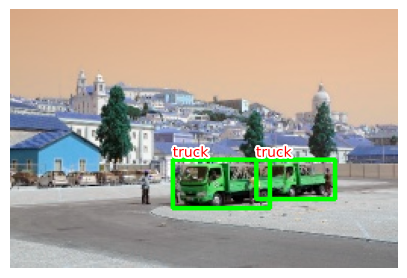

[11/03/25 07:40:52] INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/45cf4ae90f70a9b2.jpg` from input                                  ]8;id=262674;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=953938;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/45cf4ae90f70a9b2.jpg: 480x640 1 bus, 58.8ms
Speed: 2.9ms preprocess, 58.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


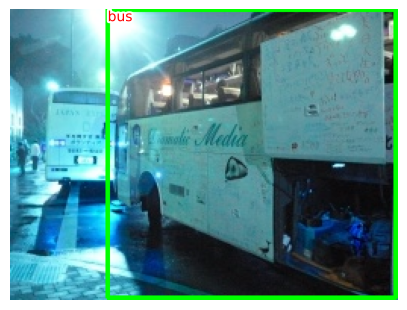

                    INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/1860d1cc1e82323e.jpg` from input                                  ]8;id=945989;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=154100;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/1860d1cc1e82323e.jpg: 640x448 1 bus, 1 truck, 61.8ms
Speed: 2.4ms preprocess, 61.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


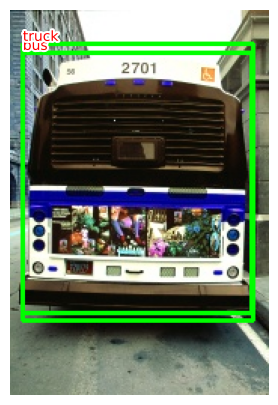

                    INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/8a276ed5d8608eca.jpg` from input                                  ]8;id=942500;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=891786;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/8a276ed5d8608eca.jpg: 448x640 2 trucks, 28.1ms
Speed: 2.6ms preprocess, 28.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


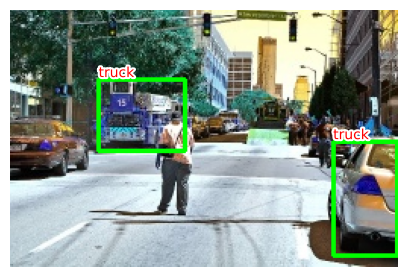

                    INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/3b13c2c588f28979.jpg` from input                                  ]8;id=105592;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=370977;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/3b13c2c588f28979.jpg: 480x640 1 truck, 28.8ms
Speed: 3.1ms preprocess, 28.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


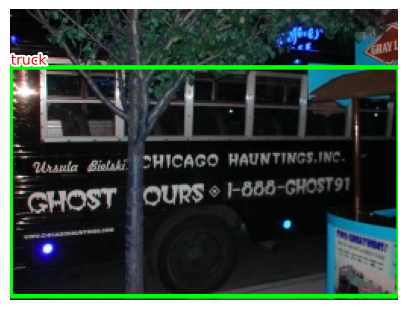

                    INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/f36a1fba3c6c05e9.jpg` from input                                  ]8;id=957361;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=214410;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/f36a1fba3c6c05e9.jpg: 416x640 1 bus, 71.4ms
Speed: 3.2ms preprocess, 71.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


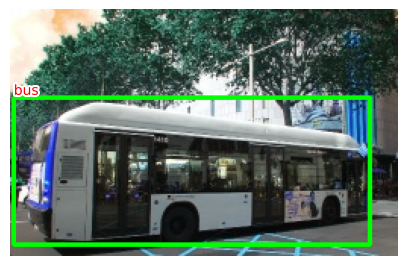

[11/03/25 07:40:53] INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/02e647dcd238f3e4.jpg` from input                                  ]8;id=546678;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=273145;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/02e647dcd238f3e4.jpg: 448x640 1 bus, 28.2ms
Speed: 2.5ms preprocess, 28.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


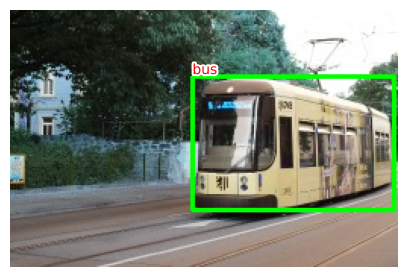

                    INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/bee0f4989531405a.jpg` from input                                  ]8;id=960489;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=14723;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/bee0f4989531405a.jpg: 480x640 1 truck, 28.9ms
Speed: 2.8ms preprocess, 28.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


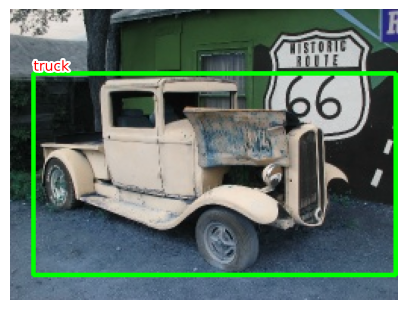

                    INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/9e5e6bac1effd6bb.jpg` from input                                  ]8;id=744754;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=864912;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/9e5e6bac1effd6bb.jpg: 448x640 1 truck, 28.2ms
Speed: 3.4ms preprocess, 28.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


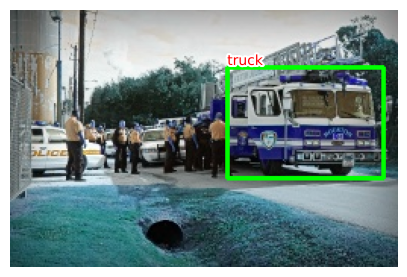

                    INFO     Chose `/content/yolo-open-images-bus-trucks-all/images/val/0747490deae6280e.jpg` from input                                  ]8;id=641620;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138\logger.py]8;;\:]8;id=517553;file:///usr/local/lib/python3.12/dist-packages/torch_snippets/logger.py:138#Info:138\Info:138]8;;\


image 1/1 /content/yolo-open-images-bus-trucks-all/images/val/0747490deae6280e.jpg: 640x512 2 buss, 73.1ms
Speed: 3.2ms preprocess, 73.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


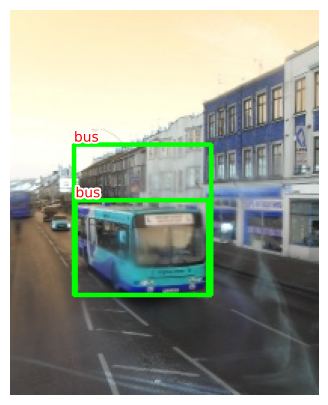

In [8]:
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
val_images = Glob("/content/yolo-open-images-bus-trucks-all/images/val/")

for _ in range(10):
  results = model(choose(val_images))
  boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
  classes = [results[0].names[cls] for cls in results[0].boxes.cls.cpu().numpy()]
  show(results[0].orig_img, bbs=boxes, texts=classes, sz=5, text_sz=10)